# Computational Challenge 8
Group 4: Alan, Zhao, Rahsed, Megan

Group 4: Consider the two-player public goods game described above for Group 3.
Consider a two-player Public Goods game played between two players X and Y. This game is similar to the donation game discussed in class and the moves are cooperate or defect：

| P.D | C | D |
| --- | --- | --- |
| C | (B-C) | (B/2-C) |
| D | (B/2) | 0 |

The payoff matrix for TFT, ALLD, ALLC in a Prisoner's Dilemma that is repeated for m rounds, on average, is given by:


(a) We will consider three iterated prisoner’s dilemma strategies in the absence of errors, ALLD, {0, 0, 0, 0}, TFT {1, 0, 1, 0} and ALLC {1, 1, 1, 1}. Assuming TFT starts off cooperating, and there are no errors, write down the payoffs received for each of the six pairwise matchups between these strategies when playing against the other in the infinitely iterated game (you should not need to simulate this)

(b) Write down the fitness for each of these strategies under the Moran model. Calculate via simulation the fixation probability for each of the possible invasions (6 in total), for a population of N = 1000 and w = 1.


If the game is infinitely repeated the payoff of the game can be calculated from the stationary distribution

ALLC/ALLD:

| 1. | ALLC | ALLD |
| --- | --- | --- |
| ALLC | B-C | B/2-C |
| ALLD | B/2 | 0 |

If there is i player choose ALLC strategy, and N-i players choose ALLD strategy

Expected payoff to ALLC player individual:

$$ F_1i = \frac{(B-C)(i-1)+(B/2-C)(N-i)}{N-1} $$

Expected payoff to ALLD player individual:

$$ G_1i = \frac{B/2}{N-1} $$

TFT/ALLD:

| 2. | TFT | ALLD |
| --- | --- | --- |
| TFT | B-C | 0 |
| ALLD | 0 | 0 |

If there is i player choose TFT strategy, and N-i players choose ALLD strategy

Expected payoff to TFT player individual:

$$ F_2i = \frac{(B-C)(i-1)}{N-1} $$

Expected payoff to ALLD player individual:

$$ G_2i = \frac{B/2}{N-1} $$


TFT/ALLC:

| 3. | TFT | ALLC |
| --- | --- | --- |
| TFT | B-C | B-C |
| ALLC | B-C | B-C |

If there is i player choose TFT strategy, and N-i players choose ALLC strategy.

Expected payoff to TFT player individual:

$$ F_3i = \frac{(B-C)(i-1)+(B-C)(N-i)}{N-1} = B-C $$

Expected payoff to ALLC player individual:

$$ G_3i = B-C $$


| 4. | TFT1 | TFT2 |
| --- | --- | --- |
| TFT1 | B-C | B-C |
| TFT2 | B-C | B-C |

If there is i player choose TFT1 strategy, and N-i players choose TFT2 strategy.

Expected payoff to TFT1 player individual:

$$ F_4i = B-C $$

Expected payoff to TFT2 player individual:

$$ G_4i = B-C $$


| 5. | ALLC1 | ALLC2 |
| --- | --- | --- |
| ALLC1 | B-C | B-C |
| ALLC2 | B-C | B-C |

If there is i player choose ALLC1 strategy, and N-i players choose ALLC2 strategy.

Expected payoff to ALLC1 player individual:

$$ F_5i = B-C $$

Expected payoff to ALLC2 player individual:

$$ G_5i = B-C $$

The fitness of TFT1 is: $ f_5i = 1 - w + w(B-C)m$

The fitness of TFT2 is: $ g_4i = 1- w + w(B-C)m $

| 6. | ALLD | ALLD |
| --- | --- | --- |
| ALLD | 0 | 0 |
| ALLD | 0 | 0 |

If there is i player choose ALLD1 strategy, and N-i players choose ALLD2 strategy.

Expected payoff to ALLD1 player individual:

$$ F_6i = 0 $$

Expected payoff to ALLD2 player individual:

$$ G_6i = 0 $$


(b) Write down the fitness for each of these strategies under the Moran model. Calculate via simulation the fixation probability for each of the possible invasions (6 in total), for a population of N = 1000 and w = 1.

In [8]:
# run a moran
import numpy as np
from numba import jit

@jit
def Fi(a,b,i,N=1000,w=0.995):
    return 1-w+w*(a*i-a+b*N-b*i)/(N-1)
@jit
def Gi(c,d,i,N=1000,w=0.995):
    return 1-w+w*(c*i+d*N-d*i-d)/(N-1)

@jit
def probUp(fi,gi,i,mu = 0,N=1000):
    return i*fi*(N-i)/((i*fi+gi*N-gi*i)*N) + mu*(N-i)/N
@jit
def probDown(fi,gi,i,mu = 0, N = 1000):
    return (N-i)*gi*i/((i*fi+N*gi-gi*i)*N) + mu*i/N

@jit
def oneMoran(i,a,b,c,d,mut = 0,numSteps = 10000,N=1000,w=1):
    
    # track i
    tracker = np.zeros(numSteps)
    otherguy = np.zeros(numSteps)
    
    for k in range(numSteps):
        # record state
        tracker[k] = i; otherguy[k] = N-i
        
        # get probs
        if i > 0:
            f = Fi(a,b,i) 
            g = Gi(c,d,i)
        else: f = 0; g = 0
            
        if i > 0 or (g > 0 or f > 0):
            pup = probUp(f,g,i,mu = mut) 
            pd = probDown(f,g,i,mu = mut)
        else: pd = 0; pup = mu*(N-i)/N
        
        # birth/death
        check = np.random.rand()
        
        if check < pup: i += 1
        elif check > 1-pd: i -= 1
        
        if i < 0: i = 0
    return tracker,otherguy

In [9]:
# Run a simulation: 
# here, seeing if we can get TFT to invade allD
import matplotlib.pyplot as plt
from numba import autojit, prange


numTrials = 100000
B = 1.5; C = 1

@jit
def TvsD(B,C,i = 999):
    allD,TFT = oneMoran(i,B-C,0,0,0,mut = mu)
    return allD,TFT

@jit
def TvsC(B,C,i=999):
    TFT,allC = oneMoran(i,B-C,B-C,B-C,B-C,mut = mu)
    return TFT,allC

@jit
def CvsD(B,C,i=999):
    allC,allD = oneMoran(i,B-C,B/2-C,B/2,0,mut = mu)
    return allC,allD

@jit
def TvsT(B,C,i=999):
    TFT1, TFT2 = oneMoran(i,B-C,B-C,B-C,B-C,mut = mu)
    return TFT1,TFT2

@jit
def CvsC(B,C,i=999):
    ALLC1, ALLC2 = oneMoran(i,B-C,B-C,B-C,B-C,mut = mu)
    return ALLC1,ALLC2

@jit
def DvsD(B,C,i=999):
    ALLD1, ALLD2 = oneMoran(i,0,0,0,0,mut = mu)
    return ALLD1,ALLD2

@jit
def fixProbTvsD(numTrials,B,C):
    
    i_array = (10,100,200,500,700,900,990)
    iProb = np.zeros(len(i_array)); index = 0
    for iThis in i_array:
        probs = np.zeros(numTrials)
        for j in prange(numTrials):
            ack,bat = TvsD(B,C,i=iThis)
            probs[j] = ack[-1]
        
        short =probs[np.where(probs == 1000)]
        
        iProb[index] = len(short)/numTrials
        index += 1
        
    return i_array,iProb
@jit
def fixProbTvsC(numTrials,B,C):
    
    i_array = (10,100,200,500,700,900,990)
    iProb = np.zeros(len(i_array)); index = 0
    for iThis in i_array:
        probs = np.zeros(numTrials)
        for j in prange(numTrials):
            ack,bat = TvsC(B,C,i=iThis)
            probs[j] = ack[-1]
        
        short =probs[np.where(probs == 1000)]
        
        iProb[index] = len(short)/numTrials
        index += 1
        
    return i_array,iProb
@jit
def fixProbCvsD(numTrials,B,C):
    
    i_array = (10,100,200,500,700,800,900,950,990)
    iProb = np.zeros(len(i_array)); index = 0
    for iThis in i_array:
        probs = np.zeros(numTrials)
        for j in prange(numTrials):
            ack,bat = CvsD(B,C,i=iThis)
            probs[j] = ack[-1]
        
      
        short =probs[np.where(probs == 1000)]
        
        iProb[index] = len(short)/numTrials
        index += 1
        
    return i_array,iProb
@jit
def fixProbTvsT(numTrials,B,C):
    
    i_array = (10,100,200,500,700,800,900,950,990)
    iProb = np.zeros(len(i_array)); index = 0
    for iThis in i_array:
        probs = np.zeros(numTrials)
        for j in prange(numTrials):
            ack,bat = CvsD(B,C,i=iThis)
            probs[j] = ack[-1]
        
      
        short =probs[np.where(probs == 1000)]
        
        iProb[index] = len(short)/numTrials
        index += 1
        
    return i_array,iProb
@jit
def fixProbCvsC(numTrials,B,C):
    
    i_array = (10,100,200,500,700,800,900,950,990)
    iProb = np.zeros(len(i_array)); index = 0
    for iThis in i_array:
        probs = np.zeros(numTrials)
        for j in prange(numTrials):
            ack,bat = CvsC(B,C,i=iThis)
            probs[j] = ack[-1]
        
      
        short =probs[np.where(probs == 1000)]
        
        iProb[index] = len(short)/numTrials
        index += 1
        
    return i_array,iProb
@jit
def fixProbDvsD(numTrials,B,C):
    
    i_array = (10,100,200,500,700,800,900,950,990)
    iProb = np.zeros(len(i_array)); index = 0
    for iThis in i_array:
        probs = np.zeros(numTrials)
        for j in prange(numTrials):
            ack,bat = DvsD(B,C,i=iThis)
            probs[j] = ack[-1]
        
      
        short =probs[np.where(probs == 1000)]
        
        iProb[index] = len(short)/numTrials
        index += 1
        
    return i_array,iProb

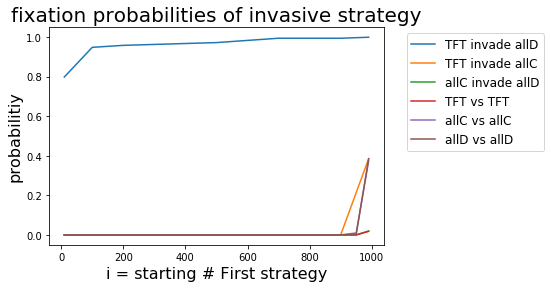

In [10]:
# fixation probabilities vs i for non-mutating version

B = 1.5; C = 1; mu = 0
x,y = fixProbTvsD(1000,B,C)
plt.plot(x,y,label ="TFT invade allD")
plt.title("fixation probabilities of invasive strategy",fontsize = 20)

x,y = fixProbTvsC(5000,B,C)
plt.plot(x,y,label ="TFT invade allC")

x,y = fixProbCvsD(1000,B,C)
plt.plot(x,y,label ="allC invade allD")

x,y = fixProbTvsT(1000,B,C)
plt.plot(x,y,label = "TFT vs TFT")

x,y = fixProbCvsC(1000,B,C)
plt.plot(x,y,label = "allC vs allC")

x,y = fixProbDvsD(1000,B,C)
plt.plot(x,y,label = "allD vs allD")


plt.xlabel("i = starting # First strategy",fontsize = 16)
plt.ylabel("probabilitiy",fontsize = 16)
plt.legend(fontsize = 12, bbox_to_anchor=(1.05, 1))

(c) Now we will run simulations allowing mutations between strategies at rate µ = 0.01. Plot a histogram showing the distribution of strategy frequencies once the system has
reached equilibrium.


Text(0.5, 1.05, 'ALLD vs ALLD')

<Figure size 432x288 with 0 Axes>

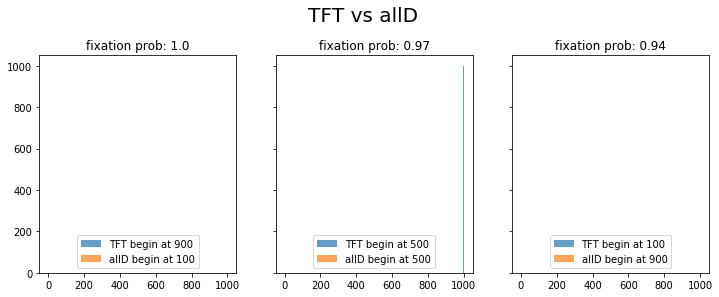

<Figure size 432x288 with 0 Axes>

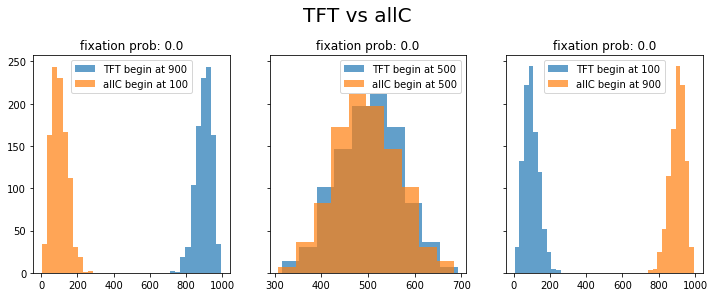

<Figure size 432x288 with 0 Axes>

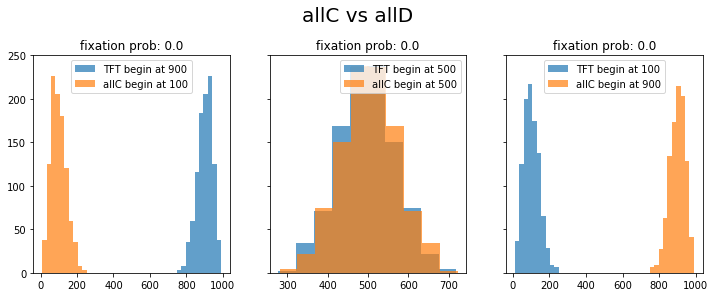

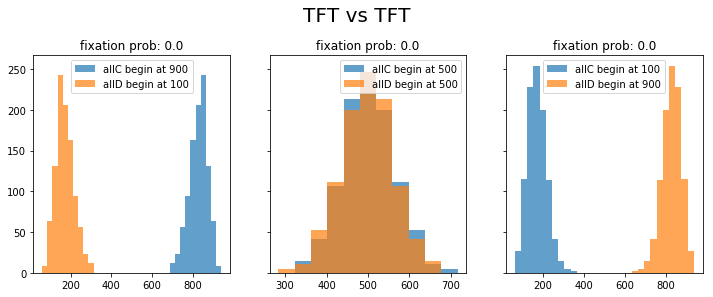

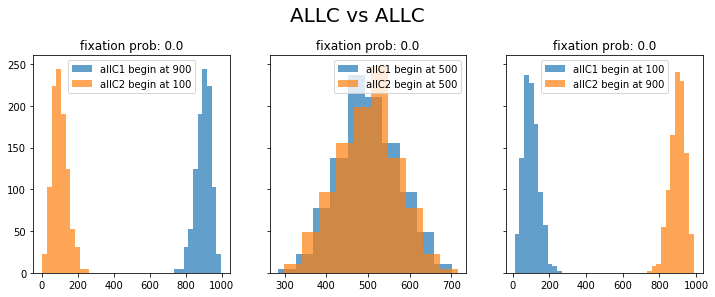

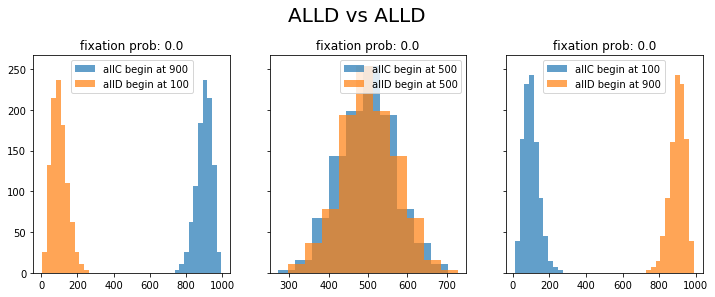

In [11]:
# histograms
from collections import Counter
B = 1.5; C = 1
numTrials = 1000; mu = 0.01; al = .7
plt.figure()

def onHistTD(i,ax):
    histTFT = np.zeros(numTrials); histD = np.zeros(numTrials)
    for j in range(0,numTrials):
        t,ad = TvsD(B,C,i)
        histTFT[j] = t[-1]; histD[j] = ad[-1]

    ax.hist(histTFT, bins = 1,label = "TFT begin at " + str(i),alpha = al)
    ax.hist(histD,label = "allD begin at "+ str(1000-i),alpha = al)
    ax.legend()

    short = histTFT[np.where(histTFT == 1000)]
    fixProb = len(short)/numTrials
    ax.set_title("fixation prob: " + str(round(fixProb,2)))
   

    
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey = "row",figsize = (12,4))
onHistTD(900,ax1)
onHistTD(500,ax2)
onHistTD(100,ax3)

f.suptitle("TFT vs allD",fontsize = 20,y = 1.05)

plt.figure()

def onHistTC(i,ax):
    histTFT = np.zeros(numTrials); histD = np.zeros(numTrials)
    for j in range(0,numTrials):
        t,ad = TvsC(B,C,i)
        histTFT[j] = t[-1]; histD[j] = ad[-1]

    ax.hist(histTFT, label = "TFT begin at " + str(i),alpha = al)
    ax.hist(histD,label = "allC begin at "+ str(1000-i),alpha = al)
    ax.legend()
    short = histTFT[np.where(histTFT == 1000)]
    fixProb = len(short)/numTrials
    ax.set_title("fixation prob: " + str(round(fixProb,2)))
    
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey = "row",figsize = (12,4))
onHistTC(900,ax1)
onHistTC(500,ax2)
onHistTC(100,ax3)
f.suptitle("TFT vs allC",fontsize = 20,y = 1.05)

plt.figure()

def onHistCD(i,ax):
    histC = np.zeros(numTrials); histD = np.zeros(numTrials)
    for j in range(0,numTrials):
        t,ad = CvsD(B,C,i)
        histC[j] = t[-1]; histD[j] = ad[-1]

    ax.hist(histC, label = "allC begin at " + str(i),alpha = al)
    ax.hist(histD,label = "allD begin at "+ str(1000-i),alpha = al)
    ax.legend()
    short = histC[np.where(histC == 1000)]
    fixProb = len(short)/numTrials
    ax.set_title("fixation prob: " + str(round(fixProb,2)))
    
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey = "row",figsize = (12,4))
onHistTC(900,ax1)
onHistTC(500,ax2)
onHistTC(100,ax3)
f.suptitle("allC vs allD",fontsize = 20,y = 1.05)

def onHistTT(i,ax):
    histTFT1 = np.zeros(numTrials); histTFT2 = np.zeros(numTrials)
    for j in range(0,numTrials):
        t,ad = TvsT(B,C,i)
        histTFT1[j] = t[-1]; histTFT2[j] = ad[-1]

    ax.hist(histTFT1, label = "allC begin at " + str(i),alpha = al)
    ax.hist(histTFT2,label = "allD begin at "+ str(1000-i),alpha = al)
    ax.legend()
    short = histTFT1[np.where(histTFT1 == 1000)]
    fixProb = len(short)/numTrials
    ax.set_title("fixation prob: " + str(round(fixProb,2)))
    
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey = "row",figsize = (12,4))
onHistTT(900,ax1)
onHistTT(500,ax2)
onHistTT(100,ax3)
f.suptitle("TFT vs TFT",fontsize = 20,y = 1.05)

def onHistCC(i,ax):
    histALLC1 = np.zeros(numTrials); histALLC2 = np.zeros(numTrials)
    for j in range(0,numTrials):
        t,ad = CvsC(B,C,i)
        histALLC1[j] = t[-1]; histALLC2[j] = ad[-1]

    ax.hist(histALLC1, label = "allC1 begin at " + str(i),alpha = al)
    ax.hist(histALLC2,label = "allC2 begin at "+ str(1000-i),alpha = al)
    ax.legend()
    short = histALLC1[np.where(histALLC1 == 1000)]
    fixProb = len(short)/numTrials
    ax.set_title("fixation prob: " + str(round(fixProb,2)))
    
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey = "row",figsize = (12,4))
onHistCC(900,ax1)
onHistCC(500,ax2)
onHistCC(100,ax3)
f.suptitle("ALLC vs ALLC",fontsize = 20,y = 1.05)

def onHistDD(i,ax):
    histALLD1 = np.zeros(numTrials); histALLD2 = np.zeros(numTrials)
    for j in range(0,numTrials):
        t,ad = DvsD(B,C,i)
        histALLD1[j] = t[-1]; histALLD2[j] = ad[-1]

    ax.hist(histALLD1, label = "allC begin at " + str(i),alpha = al)
    ax.hist(histALLD2,label = "allD begin at "+ str(1000-i),alpha = al)
    ax.legend()
    short = histALLD1[np.where(histALLD1 == 1000)]
    fixProb = len(short)/numTrials
    ax.set_title("fixation prob: " + str(round(fixProb,2)))
    
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey = "row",figsize = (12,4))
onHistDD(900,ax1)
onHistDD(500,ax2)
onHistDD(100,ax3)
f.suptitle("ALLD vs ALLD",fontsize = 20,y = 1.05)